In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import smtplib
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

In [2]:
data = pd.read_csv(r"C:\Users\soham\Downloads\healthcare_dataset.csv",index_col='Date of Admission',parse_dates=['Date of Admission'] )
data.head()

,Name,Age,Gender,Blood Type,Medical Condition,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
Date of Admission,,,,,,,,,,,,,,
2024-01-31,Bobby JacksOn,30,Male,B-,Cancer,Matthew Smith,Sons and Miller,Blue Cross,18856.281306,328,Urgent,2024-02-02,Paracetamol,Normal
2019-08-20,LesLie TErRy,62,Male,A+,Obesity,Samantha Davies,Kim Inc,Medicare,33643.327287,265,Emergency,2019-08-26,Ibuprofen,Inconclusive
2022-09-22,DaNnY sMitH,76,Female,A-,Obesity,Tiffany Mitchell,Cook PLC,Aetna,27955.096079,205,Emergency,2022-10-07,Aspirin,Normal
2020-11-18,andrEw waTtS,28,Female,O+,Diabetes,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.782410,450,Elective,2020-12-18,Ibuprofen,Abnormal
2022-09-19,adrIENNE bEll,43,Female,AB+,Cancer,Kathleen Hanna,White-White,Aetna,14238.317814,458,Urgent,2022-10-09,Penicillin,Abnormal


In [3]:
data['Name'] = data['Name'].str.lower()
data.head()

,Name,Age,Gender,Blood Type,Medical Condition,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
Date of Admission,,,,,,,,,,,,,,
2024-01-31,bobby jackson,30,Male,B-,Cancer,Matthew Smith,Sons and Miller,Blue Cross,18856.281306,328,Urgent,2024-02-02,Paracetamol,Normal
2019-08-20,leslie terry,62,Male,A+,Obesity,Samantha Davies,Kim Inc,Medicare,33643.327287,265,Emergency,2019-08-26,Ibuprofen,Inconclusive
2022-09-22,danny smith,76,Female,A-,Obesity,Tiffany Mitchell,Cook PLC,Aetna,27955.096079,205,Emergency,2022-10-07,Aspirin,Normal
2020-11-18,andrew watts,28,Female,O+,Diabetes,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.782410,450,Elective,2020-12-18,Ibuprofen,Abnormal
2022-09-19,adrienne bell,43,Female,AB+,Cancer,Kathleen Hanna,White-White,Aetna,14238.317814,458,Urgent,2022-10-09,Penicillin,Abnormal


In [4]:
dr = LabelEncoder()

In [5]:
label = dr.fit_transform(data['Medical Condition'])

In [6]:
data['Medical Condition'] = dr.fit_transform(data['Medical Condition'].map({'Cancer': 1, 'Asthma': 0, 'Obesity' :0, 'Hypertension' :0, 'Diabetes' :0, 'Arthritis' :0}))

In [7]:
data['Medical Condition'] = data['Medical Condition'].replace({'Cancer': 1, 'Asthma': 0, 'Obesity' :0, 'Hypertension' :0, 'Diabetes' :0, 'Arthritis' :0})

In [10]:
data.head()

,Name,Age,Gender,Blood Type,Medical Condition,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
Date of Admission,,,,,,,,,,,,,,
2024-01-31,bobby jackson,30,Male,B-,1,Matthew Smith,Sons and Miller,Blue Cross,18856.281306,328,Urgent,2024-02-02,Paracetamol,Normal
2019-08-20,leslie terry,62,Male,A+,0,Samantha Davies,Kim Inc,Medicare,33643.327287,265,Emergency,2019-08-26,Ibuprofen,Inconclusive
2022-09-22,danny smith,76,Female,A-,0,Tiffany Mitchell,Cook PLC,Aetna,27955.096079,205,Emergency,2022-10-07,Aspirin,Normal
2020-11-18,andrew watts,28,Female,O+,0,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.782410,450,Elective,2020-12-18,Ibuprofen,Abnormal
2022-09-19,adrienne bell,43,Female,AB+,1,Kathleen Hanna,White-White,Aetna,14238.317814,458,Urgent,2022-10-09,Penicillin,Abnormal


In [11]:
ts=data['Medical Condition'].resample('M').sum()
ts.head()

Date of Admission
2019-05-31    119
2019-06-30    154
2019-07-31    170
2019-08-31    161
2019-09-30    168
Freq: M, Name: Medical Condition, dtype: int64

In [14]:
train =ts[:64]
test =ts[64:]

In [15]:
from statsmodels.tsa.arima.model import ARIMA

In [19]:
model = ARIMA(train, order=(5,0,4))
model_fit = model.fit()
forecast = model_fit.predict(params=model_fit.params)

In [18]:
import warnings
warnings.filterwarnings('ignore')

In [20]:
forecast_steps = 64

In [21]:
predictions = model_fit.predict(start=len(train), end=len(train) + forecast_steps - 1, typ='levels')

In [22]:
len(train),(len(ts)-1)

(61, 60)

In [23]:
final_model = ARIMA(ts,order=(5,0,4)).fit()

In [40]:
predictions = final_model.predict(len(ts),len(ts)+6)

In [32]:
predictions

2024-06-30    117.882752
2024-07-31    178.842181
2024-08-31    110.875653
2024-09-30    110.917770
2024-10-31    124.732364
2024-11-30    160.194422
2024-12-31    154.439326
Freq: M, Name: predicted_mean, dtype: float64

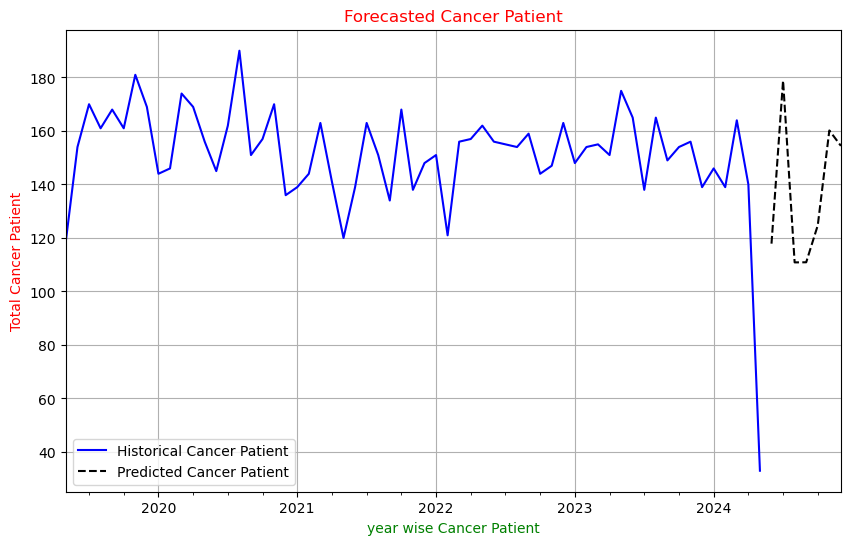

In [39]:
ts.plot(legend=True,label='Historical Cancer Patient',c='b',figsize=(10,6))
predictions.plot(legend=True,label='Predicted Cancer Patient',c='black',ls='--')
plt.grid()
plt.ylabel('Total Cancer Patient',c='r')
plt.xlabel('year wise Cancer Patient',c='g')
plt.title('Forecasted Cancer Patient',c='r')
plt.show()